# Problem Statement

# Required Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import pickle
from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTE

#  Data Gathering

In [2]:
df = pd.read_csv("LoanData.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# EDA


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df.isna()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [8]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [9]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [10]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [11]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

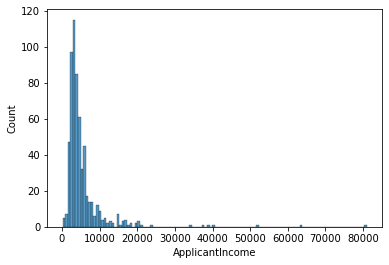

In [12]:
sns.histplot(df['ApplicantIncome'])  #Checked distribution of data

C:\Users\DELL\Anaconda3\desktop\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ApplicantIncome'>

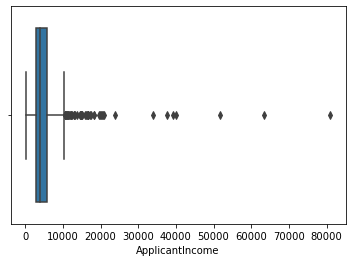

In [13]:
sns.boxplot(df['ApplicantIncome'])   #Checked Outliers

C:\Users\DELL\Anaconda3\desktop\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ApplicantIncome'>

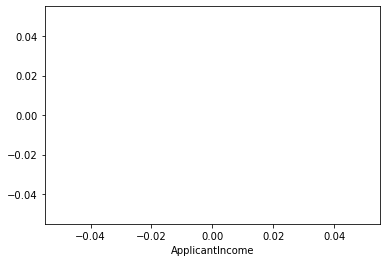

In [14]:
sns.scatterplot(df['ApplicantIncome'])   #Check Varience

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Count'>

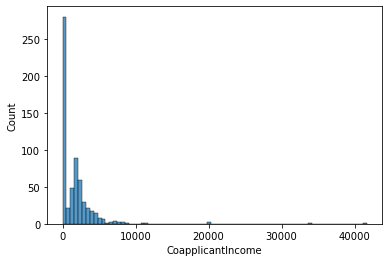

In [15]:
sns.histplot(df['CoapplicantIncome'])

C:\Users\DELL\Anaconda3\desktop\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CoapplicantIncome'>

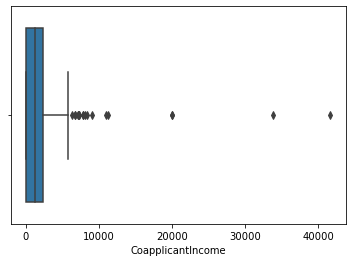

In [16]:
sns.boxplot(df['CoapplicantIncome']) 

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

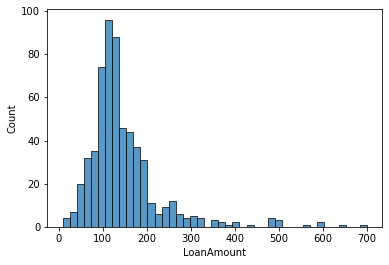

In [17]:
sns.histplot(df['LoanAmount'])

C:\Users\DELL\Anaconda3\desktop\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LoanAmount'>

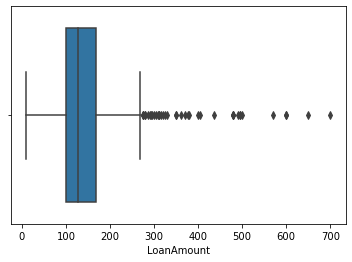

In [18]:
sns.boxplot(df['LoanAmount']) 

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Count'>

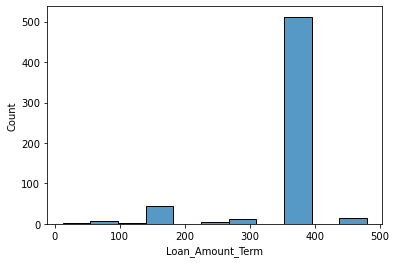

In [19]:
sns.histplot(df['Loan_Amount_Term'])

C:\Users\DELL\Anaconda3\desktop\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Amount_Term'>

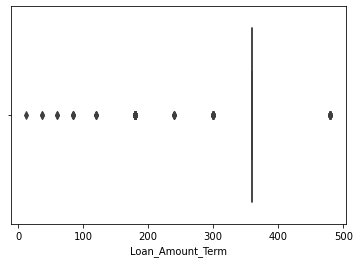

In [20]:
sns.boxplot(df['Loan_Amount_Term']) 

In [21]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

<AxesSubplot:xlabel='Credit_History', ylabel='Count'>

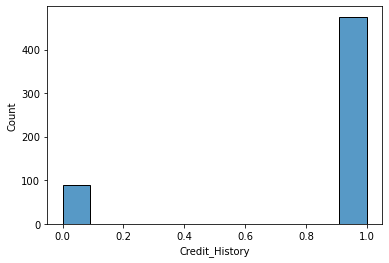

In [22]:
sns.histplot(df['Credit_History'])

C:\Users\DELL\Anaconda3\desktop\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit_History'>

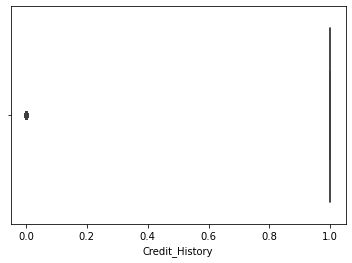

In [23]:
sns.boxplot(df['Credit_History']) 

<AxesSubplot:xlabel='Property_Area', ylabel='Count'>

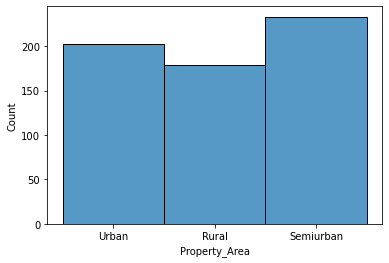

In [24]:
sns.histplot(df['Property_Area'])

In [25]:
cross_tab=pd.crosstab(df["Gender"], df["Loan_Status"])
cross_tab

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


In [26]:
cross_tab=pd.crosstab(df["Credit_History"], df["Loan_Status"])
cross_tab

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


<AxesSubplot:xlabel='ApplicantIncome', ylabel='count'>

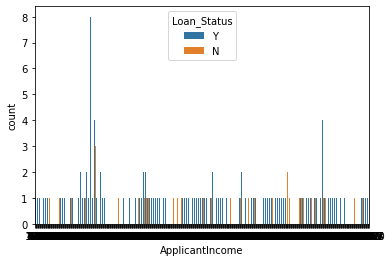

In [27]:
sns.countplot(x=df["ApplicantIncome"], hue=df["Loan_Status"])

# Data Preprocessing

In [28]:
# Catagerical Feature
df["Gender"].fillna(df["Gender"].mode()[0],inplace=True)
df["Married"].fillna(df["Married"].mode()[0],inplace=True)
df["Dependents"].fillna(df["Dependents"].mode()[0],inplace=True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0],inplace=True)
df["Credit_History"].fillna(df["Credit_History"].mode()[0],inplace=True)

In [29]:
# Continues Feature
knn_ip=KNNImputer(n_neighbors=2)
df["LoanAmount"]=knn_ip.fit_transform(df[["LoanAmount"]])
df["Loan_Amount_Term"]=knn_ip.fit_transform(df[["Loan_Amount_Term"]])

In [30]:
q1=df["ApplicantIncome"].quantile(0.25)
q3=df["ApplicantIncome"].quantile(0.75)
iqr=q3-q1
upper_tail=q3+ 3*iqr
lower_tail=q1- 3*iqr

In [31]:
outliers=df[(df["ApplicantIncome"]<lower_tail)|(df["ApplicantIncome"]>upper_tail)]
outliers

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
115,LP001401,Male,Yes,1,Graduate,No,14583,0.0,185.000000,180.0,1.0,Rural,Y
126,LP001448,Male,Yes,3+,Graduate,No,23803,0.0,370.000000,360.0,1.0,Rural,Y
130,LP001469,Male,No,0,Graduate,Yes,20166,0.0,650.000000,480.0,1.0,Urban,Y
138,LP001492,Male,No,0,Graduate,No,14999,0.0,242.000000,360.0,0.0,Semiurban,N
146,LP001516,Female,Yes,2,Graduate,No,14866,0.0,70.000000,360.0,1.0,Urban,Y
155,LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600.000000,180.0,0.0,Semiurban,Y
171,LP001585,Male,Yes,3+,Graduate,No,51763,0.0,700.000000,300.0,1.0,Urban,Y
183,LP001637,Male,Yes,1,Graduate,No,33846,0.0,260.000000,360.0,1.0,Semiurban,N
185,LP001640,Male,Yes,0,Graduate,Yes,39147,4750.0,120.000000,360.0,1.0,Semiurban,Y
254,LP001844,Male,No,0,Graduate,Yes,16250,0.0,192.000000,360.0,0.0,Urban,N


In [32]:
df['ApplicantIncome'] = np.where(df['ApplicantIncome']>upper_tail ,df['ApplicantIncome'].median(), df['ApplicantIncome'])
df['ApplicantIncome'] = np.where(df['ApplicantIncome']<lower_tail ,df['ApplicantIncome'].median(), df['ApplicantIncome'])

In [33]:
q1=df["CoapplicantIncome"].quantile(0.25)
q3=df["CoapplicantIncome"].quantile(0.75)
iqr=q3-q1
upper_tail=q3+ 3*iqr
lower_tail=q1- 3*iqr

In [34]:
df["CoapplicantIncome"] = np.where(df["CoapplicantIncome"]>upper_tail ,df["CoapplicantIncome"].median(), df["CoapplicantIncome"])
df["CoapplicantIncome"] = np.where(df["CoapplicantIncome"]<lower_tail ,df["CoapplicantIncome"].median(), df["CoapplicantIncome"])

In [35]:
q1=df["LoanAmount"].quantile(0.25)
q3=df["LoanAmount"].quantile(0.75)
iqr=q3-q1
upper_tail=q3+ 3*iqr
lower_tail=q1- 3*iqr

In [36]:
df["LoanAmount"] = np.where(df["LoanAmount"]>upper_tail ,df["LoanAmount"].median(), df["LoanAmount"])
df["LoanAmount"] = np.where(df["LoanAmount"]<lower_tail ,df["LoanAmount"].median(), df["LoanAmount"])

In [37]:
q1=df["Loan_Amount_Term"].quantile(0.25)
q3=df["Loan_Amount_Term"].quantile(0.75)
iqr=q3-q1
upper_tail=q3+ 3*iqr
lower_tail=q1- 3*iqr

In [38]:
df["Loan_Amount_Term"] = np.where(df["Loan_Amount_Term"]>upper_tail ,df["Loan_Amount_Term"].median(), df["Loan_Amount_Term"])
df["Loan_Amount_Term"] = np.where(df["Loan_Amount_Term"]<lower_tail ,df["Loan_Amount_Term"].median(), df["Loan_Amount_Term"])

In [39]:
df["Gender"]=df["Gender"].replace({"Male":1,"Female":0})
df["Married"]=df["Married"].replace({"Yes":1,"No":0})
df["Education"]=df["Education"].replace({"Graduate":1,"Not Graduate":0})
df["Self_Employed"]=df["Self_Employed"].replace({"Yes":1,"No":0})
df["Dependents"]=df["Dependents"].replace({"0":0,"1":1,"2":2,"3+":3})
df["Property_Area"]=df["Property_Area"].replace({"Semiurban":0,"Urban":1,"Rural":2})
df["Loan_Status"]=df["Loan_Status"].replace({"Y":1,"N":0})

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(5), int64(7), object(1)
memory usage: 62.5+ KB


In [41]:
df['Loan_Status'].value_counts()/df.shape[0]      #Data is Unbalanced

1    0.687296
0    0.312704
Name: Loan_Status, dtype: float64

In [42]:
df.drop("Loan_ID",axis=1,inplace=True)

In [43]:
X = df.drop("Loan_Status",axis=1)
Y = df["Loan_Status"]

In [44]:
smote = SMOTE()
X,Y = smote.fit_resample(X,Y)

In [45]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)    #Data Splitting

In [46]:
Model = LogisticRegression()   #Model Training
Model.fit(x_train,y_train)

C:\Users\DELL\Anaconda3\desktop\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
# Testing Evaluation
y_pred = Model.predict(x_test)
Accuracy = accuracy_score(y_test,y_pred)
Accuracy


0.7692307692307693

In [58]:
# Training Evaluation
y_pred_train = Model.predict(x_train)
Accuracy = accuracy_score(y_train,y_pred_train)
Accuracy
cnf_m=confusion_matrix(y_train,y_pred_train)
print(cnf_m)

[[ 90  59]
 [ 52 290]]


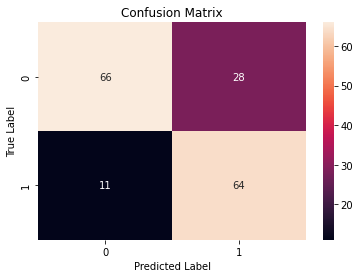

In [49]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
sns.heatmap(conf_matrix, annot=True)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [50]:
y_train_proba=Model.predict_proba(x_train)
y_train_proba=y_train_proba[:,1]
y_train_proba

array([0.67269811, 0.53114258, 0.67591804, 0.82110373, 0.89744   ,
       0.11409556, 0.89803826, 0.51921818, 0.41294944, 0.83848902,
       0.29214402, 0.53307648, 0.16226534, 0.83145964, 0.85878824,
       0.67816668, 0.64097308, 0.78317812, 0.94549903, 0.71544218,
       0.27824737, 0.29775211, 0.87479635, 0.89221492, 0.01008669,
       0.25638434, 0.86880537, 0.04128435, 0.65722678, 0.42490531,
       0.46854407, 0.82836942, 0.58179831, 0.86072297, 0.78630634,
       0.59268463, 0.46554483, 0.27504083, 0.75359624, 0.58766553,
       0.79050521, 0.3760524 , 0.86460315, 0.02188853, 0.80397336,
       0.22021097, 0.83592375, 0.38817882, 0.80121937, 0.58671849,
       0.82442178, 0.0948632 , 0.62095758, 0.01656286, 0.91344289,
       0.7111224 , 0.76325102, 0.03474398, 0.77964629, 0.45641134,
       0.34633438, 0.86897856, 0.67939735, 0.80116705, 0.72583091,
       0.76119174, 0.84170831, 0.4783548 , 0.10864947, 0.65406647,
       0.31789218, 0.15378779, 0.77465159, 0.7524119 , 0.09339

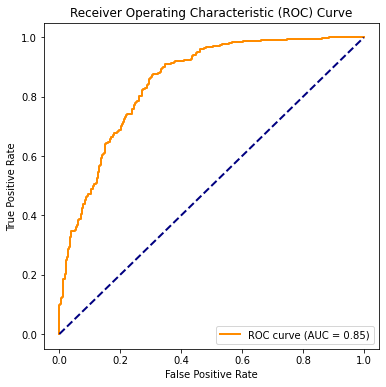

In [51]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming y_true and y_scores are your true labels and predicted probabilities
# Replace them with the actual variable names from your logistic regression model

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_train, y_train_proba)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

class CustomThresholdLogisticRegression(LogisticRegression):
    def __init__(self, threshold=0.5, **kwargs):
        self.threshold = threshold
        super().__init__(**kwargs)

    def predict(self, X):
        probabilities = super().predict_proba(X)[:, 1]
        return (probabilities >= self.threshold).astype(int)

In [71]:
x=df.drop("Loan_Status",axis=1)
y=df["Loan_Status"]

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create and train a logistic regression model with a custom threshold
model = CustomThresholdLogisticRegression(threshold=0.65)
model.fit(x_train, y_train)

C:\Users\DELL\Anaconda3\desktop\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


CustomThresholdLogisticRegression(threshold=0.65)

In [72]:
# Testing Evaluation
y_pred = model.predict(x_test)
Accuracy = accuracy_score(y_test,y_pred)
print(Accuracy)
cnf_m=confusion_matrix(y_test,y_pred)
print(cnf_m)

0.7967479674796748
[[22 21]
 [ 4 76]]


In [73]:
# Training Evaluation
y_pred_train = model.predict(x_train)
Accuracy = accuracy_score(y_train,y_pred_train)
print(Accuracy)
cnf_m=confusion_matrix(y_train,y_pred_train)
print(cnf_m)

0.780040733197556
[[ 83  66]
 [ 42 300]]


In [74]:
with open("final_model","wb") as f:
    pickle.dump(Model,f)